In [15]:
# open trump_news_2023.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# Read the CSV file
df = pd.read_csv('trump_news_2023.csv')

# Display the first few rows of the DataFrame
print(df.head())

       date                             title                 source  \
0  31.12.23              Trump administration  Associated Press (AP)   
1  31.12.23                Stock market today  Associated Press (AP)   
2  31.12.23                       LeBron doll  Associated Press (AP)   
3  31.12.23  Dominican Republic roof collapse  Associated Press (AP)   
4  31.12.23                      Stamp prices  Associated Press (AP)   

                                                link  
0  https://apnews.com/live/donald-trump-news-upda...  
1  https://apnews.com/article/stocks-markets-tari...  
2  https://apnews.com/article/lebron-james-ken-do...  
3  https://apnews.com/article/dominican-republic-...  
4  https://apnews.com/article/price-of-a-stamp-in...  


In [12]:
# Load date column, convert to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# count the number of articles per month
df['month'] = df['date'].dt.to_period('M')
# df['month'] = df['month'].dt.to_timestamp()
# Count the number of articles per month
articles_per_month = df['month'].value_counts().sort_index()

# print the number of articles per month
print("Number of articles per month:")
print(articles_per_month)

Number of articles per month:
month
2022-12     132
2023-01    1089
2023-02     957
2023-03    1056
2023-04    1023
2023-05    1551
2023-06    1617
2023-07    1056
2023-08    1056
2023-09    1023
2023-10    1056
2023-11    1023
2023-12    1056
2024-01      33
Freq: M, Name: count, dtype: int64


/var/folders/bb/zqgv5k9s16n2s1fjgg4d5mdc0000gn/T/ipykernel_73855/390298136.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


Number of articles per month for each source:
month                  2022-12  2023-01  2023-02  2023-03  2023-04  2023-05  \
source                                                                        
ABC News                    10      159       74       79       88      179   
Al Jazeera                  17       73       47       97      105      126   
Associated Press (AP)       11       96      133      134      117      186   
BBC                          0      112       84      139       52      168   
CBS News                     2      155       76      149      120      172   
FOX News                    20      113      150       77      106      204   
NBC                         36      129      107      112       95      154   
NPR                         12      100      125      111      199      145   
The New York Post            4       40       41       47       34       39   
The New York Times          20      112      120      111      107      178   

month

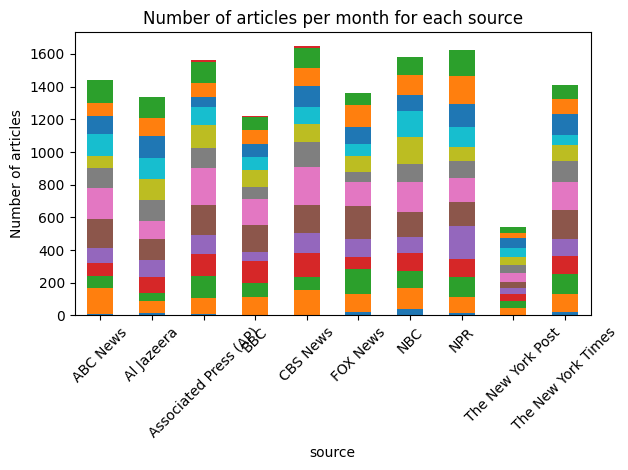

In [6]:
# Count the number of articles per month for each source
articles_per_month_source = df.groupby(['source', 'month']).size().unstack(fill_value=0)
# print the number of articles per month for each source
print("Number of articles per month for each source:")
print(articles_per_month_source)
# Plot the number of articles per month for each source
import matplotlib.pyplot as plt
articles_per_month_source.plot(kind='bar', stacked=True)
plt.title('Number of articles per month for each source')
# plt.xlabel('Month')
plt.ylabel('Number of articles')
plt.xticks(rotation=45)
# plt.legend(title='Source')
plt.tight_layout()
plt.legend([], frameon=False)
plt.show()

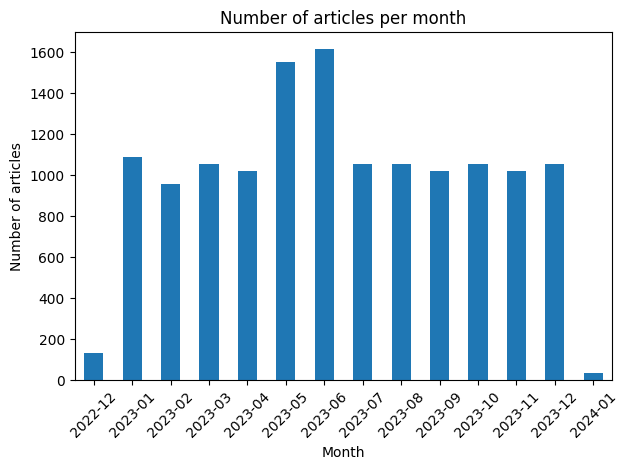

In [7]:
# Plot number of articles per month
articles_per_month.plot(kind='bar')
plt.title('Number of articles per month')
plt.xlabel('Month')
plt.ylabel('Number of articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/robertoeg/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['title_sentiment'] = df['title'].apply(get_sentiment)

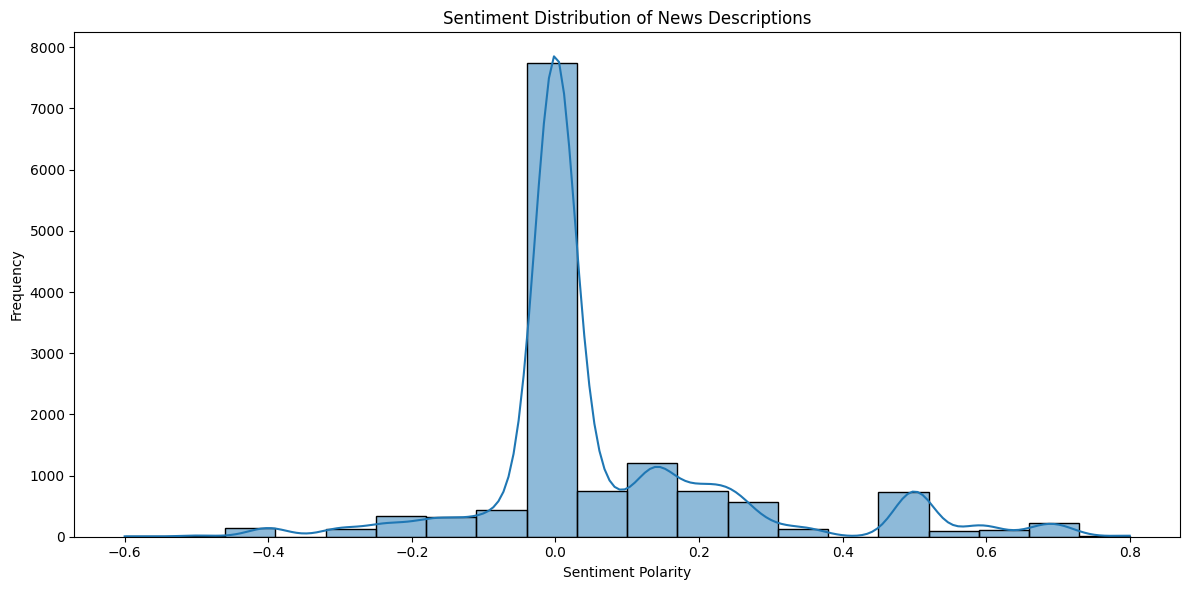

In [20]:
def plot_sentiment_distribution(df, column, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], bins=20, kde=True)
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_sentiment_distribution(df, 'title_sentiment', 'Sentiment Distribution of News Descriptions')

In [21]:
# initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()
# define a function to get the sentiment of a text
def get_sentiment(text):
    # get the sentiment polarity
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    # get the sentiment score
    sentiment_score = sia.polarity_scores(text)
    return sentiment, sentiment_score['compound']

# apply the function to the text column
df['sentiment'], df['sentiment_score'] = zip(*df['title'].apply(get_sentiment))

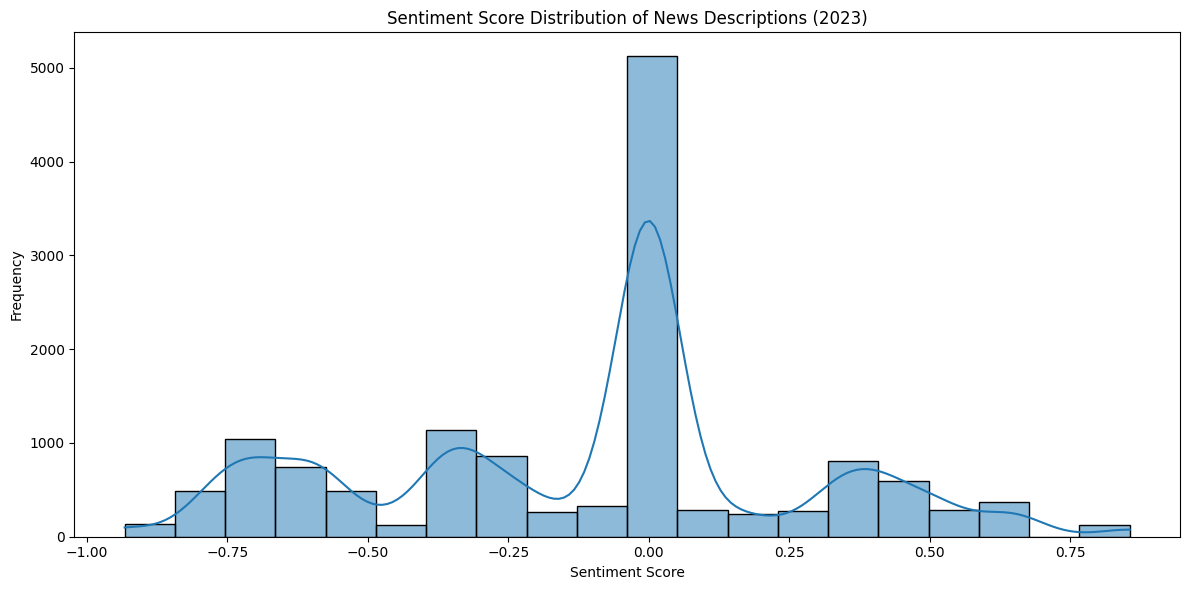

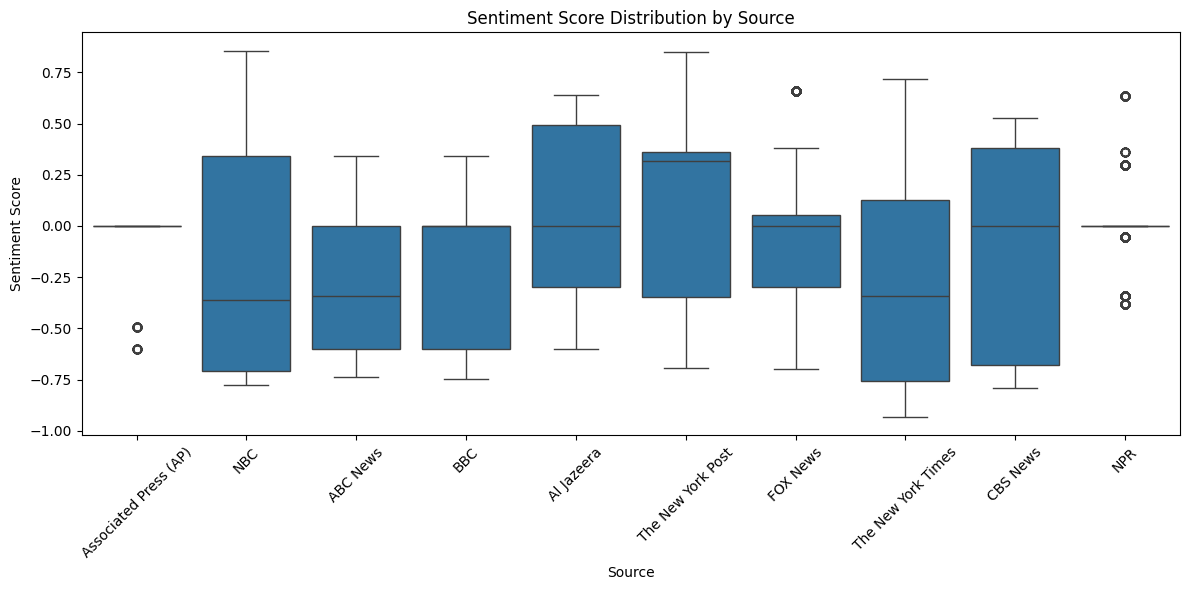

In [23]:
# plot sentiment score distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['sentiment_score'], bins=20, kde=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution of News Descriptions (2023)')
plt.tight_layout()
plt.show()
# plot sentiment score distribution by source
plt.figure(figsize=(12, 6))
sns.boxplot(x='source', y='sentiment_score', data=df)
plt.xlabel('Source')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Distribution by Source')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()